In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

## Linear Regression with One Variable¶
First some context on the problem statement. Here we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [2]:
data = pd.read_csv("ex1data1.txt", header = None)
print(data.head())
print(data.describe())

        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
               0          1
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


In [3]:
x = np.array(data.iloc[:, 0])
y = np.array(data.iloc[:, 1])
print(x)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


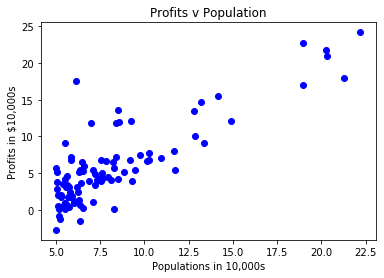

In [4]:
plt.scatter(x, y, marker = "o", color = "b")
plt.xlabel("Populations in 10,000s")
plt.ylabel("Profits in $10,000s")
plt.title("Profits v Population")
plt.show()

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(0., name = "b")
predictions = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(predictions - Y, 2)) / (2*len(x))
alpha = 0.01
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(cost)
init = tf.global_variables_initializer()
iterations = 2000
J_plot = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(iterations):
        for (x1, y1) in zip(x, y):
            sess.run(optimizer, feed_dict = {X : x1, Y : y1})
        if i % 500 == 0:
            c = sess.run(cost, feed_dict = {X:x , Y:y})
            J_plot.append(c)
            print(f"Cost after iteration {i} : {c} , W = {sess.run(W)},  b = {sess.run(b)}")
    training_cost = sess.run(cost, feed_dict = {X : x, Y : y})
    W = sess.run(W)
    b = sess.run(b)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Cost after iteration 0 : 6.870652675628662 , W = 0.644493043422699,  b = 0.007847042754292488
Cost after iteration 500 : 4.775862216949463 , W = 0.9923487305641174,  b = -2.287400007247925
Cost after iteration 1000 : 4.580202579498291 , W = 1.0862046480178833,  b = -3.217240810394287
Cost after iteration 1500 : 4.545861721038818 , W = 1.124035358428955,  b = -3.5920357704162598


Final Cost after 2000 iterations : 4.545861721038818


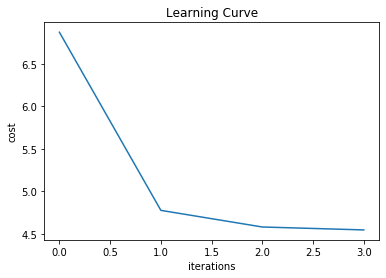

In [6]:
print(f"Final Cost after {iterations} iterations : {J_plot[-1]}")
plt.plot(J_plot)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Learning Curve")
plt.show()

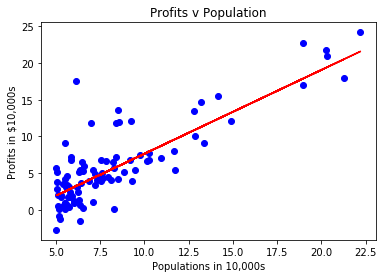

In [7]:
plt.scatter(x, y, marker = "o", color = "b")
plt.plot(x, (np.dot(x, W) + b), color = "r")
plt.xlabel("Populations in 10,000s")
plt.ylabel("Profits in $10,000s")
plt.title("Profits v Population")
plt.show()

## Code contributed by Sammya Majumdar